<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_07_%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7. 토픽 모델링으로 주제 찾기
<img src = 'http://i.imgur.com/r5e5qvs.png'>

## 7.2 사이킷런을 이용한 토픽 모델링

### 7.2.1 데이터 준비

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space', 'sci.med']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Train set size: 2742
#Selected categories: ['comp.graphics', 'rec.autos', 'sci.med', 'sci.space', 'talk.religion.misc']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english',
                     max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence '\w'
<>:3: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-24-3732477f9434>:3: DeprecationWarning: invalid escape sequence '\w'
  cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english',


### 7.2.2 LDA 토픽 모델링 실행

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 5, #추출할 topic의 수
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print('#shape of review_topics:', review_topics.shape)
print('#Sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('#Sum of topic weights of documents:', gross_topic_weights)

print('#shape of topic word distribution:', lda.components_.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#shape of review_topics: (2742, 5)
#Sample of review_topics: [0.957 0.011 0.011 0.011 0.011]
#Sum of topic weights of documents: [0.212 0.162 0.082 0.241 0.302]
#shape of topic word distribution: (5, 2000)


In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

print_top_words(lda,cv.get_feature_names_out(), 10)

Topic #0: com, space, posting, nasa, nntp, host, just, like, access, gov
Topic #1: com, people, god, jesus, msg, health, food, know, christian, don't
Topic #2: space, nasa, data, ___, gov, 1993, information, center, research, satellite
Topic #3: graphics, image, com, university, pitt, posting, file, host, computer, nntp
Topic #4: com, car, like, just, don't, think, good, it's, time, i'm



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.3 최적의 토픽 수 선택하기


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


n_components: 3, perplexity: 1137.190
n_components: 4, perplexity: 1108.387
n_components: 5, perplexity: 1084.245
n_components: 6, perplexity: 1060.164
n_components: 7, perplexity: 1014.163
n_components: 8, perplexity: 1008.310
n_components: 9, perplexity: 1001.226
n_components: 10, perplexity: 989.262


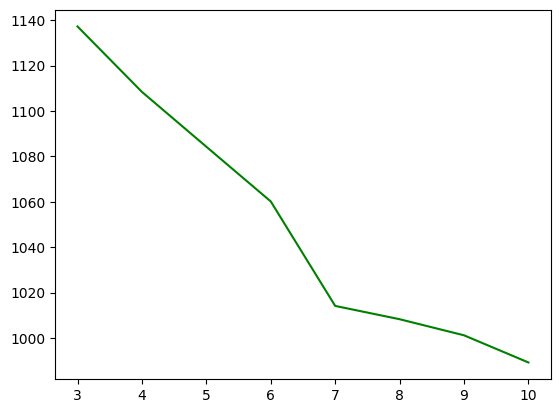

n_components with minimum perplexity: 10


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start, end):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i,
                                        random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=3, end=10))

In [ ]:
lda = LatentDirichletAllocation(n_components = 5, #추출할 topic의 수를 지정
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic #0: com, msg, health, medical, food, people, university, like, know, use
Topic #1: com, nasa, access, posting, space, gov, nntp, host, just, people
Topic #2: graphics, image, data, software, university, program, available, use, information, file
Topic #3: com, car, just, don't, like, think, people, good, know, i'm
Topic #4: space, launch, orbit, henry, nasa, toronto, earth, uiuc, lunar, moon



## 7.3 Gensim을 이용한 토픽 모델링


### 7.3.1 Gensim 사용법과 시각화

In [ ]:
!pip install --upgrade gensim --quiet
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words("english")

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

texts = [tokenizer(news) for news in newsgroups_train.data]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence '\w'
<>:7: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-32-d970226f09a5>:7: DeprecationWarning: invalid escape sequence '\w'
  RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의


In [ ]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Number of initial unique words in documents: 42677
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 2742


In [ ]:
from gensim.models import LdaModel

num_topics = 5

model = LdaModel(corpus= corpus,
                       id2word= dictionary,
                       num_topics= num_topics,
                       random_state=7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.print_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.009*"space" + 0.007*"would" + 0.007*"com" + 0.006*"___" + 0.006*"one" + 0.005*"university" + 0.005*"nasa" + 0.005*"software" + 0.005*"people" + 0.005*"like"'),
 (1,
  '0.015*"space" + 0.007*"car" + 0.007*"com" + 0.007*"would" + 0.007*"nasa" + 0.005*"one" + 0.005*"like" + 0.005*"use" + 0.005*"get" + 0.005*"new"'),
 (2,
  '0.013*"com" + 0.012*"one" + 0.010*"would" + 0.006*"people" + 0.005*"like" + 0.005*"posting" + 0.005*"see" + 0.005*"get" + 0.004*"also" + 0.004*"use"'),
 (3,
  '0.011*"com" + 0.010*"would" + 0.008*"university" + 0.007*"one" + 0.007*"i\'m" + 0.006*"posting" + 0.006*"get" + 0.006*"also" + 0.006*"know" + 0.006*"like"'),
 (4,
  '0.030*"com" + 0.008*"pitt" + 0.007*"one" + 0.007*"gordon" + 0.007*"banks" + 0.007*"geb" + 0.006*"would" + 0.006*"like" + 0.005*"reply" + 0.005*"jesus"')]

In [ ]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(0, 0.0121492315), (1, 0.012041001), (2, 0.012011153), (3, 0.012062555), (4, 0.95173603)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.4 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.005497  0.040729       1        1  28.444669
2     -0.001330  0.015071       2        1  21.796542
0      0.029485 -0.017346       3        1  20.806797
1      0.032759 -0.015602       4        1  16.315414
4     -0.055417 -0.022853       5        1  12.636578, topic_info=            Term         Freq        Total Category  logprob  loglift
1            com  3128.000000  3128.000000  Default  30.0000  30.0000
54         space  1463.000000  1463.000000  Default  29.0000  29.0000
458         pitt   406.000000   406.000000  Default  28.0000  28.0000
28        gordon   317.000000   317.000000  Default  27.0000  27.0000
1627         geb   288.000000   288.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
269         good   114.756867   925.555360   Topic5  -5.6390  -0.0190
258        think   106.274935   972.568523   Topic5  -5.7158  -0.1453
36    university   109.928868  1285.836885   Topic5  -5.6820  -0.3908
375         also   102.879523  1133.624377   Topic5  -5.7483  -0.3310
429       people   102.647584  1180.973568   Topic5  -5.7505  -0.3742

[381 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1650      1  0.108728     1991
1650      2  0.098844     1991
1650      3  0.543642     1991
1650      4  0.207572     1991
1650      5  0.049422     1991
...     ...       ...      ...
1685      1  0.069691  zoology
1685      2  0.650452  zoology
1685      3  0.069691  zoology
1685      4  0.069691  zoology
1685      5  0.116152  zoology

[1347 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

### 7.3.2 혼란도와 토픽 응집도를 이용한 최적값 선택

In [ ]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.6331765378141505


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics: 6, perplexity: -7.106, coherence: -1.704


num_topics: 7, perplexity: -7.114, coherence: -1.743


num_topics: 8, perplexity: -7.121, coherence: -1.827


num_topics: 9, perplexity: -7.126, coherence: -1.860


num_topics: 10, perplexity: -7.128, coherence: -1.841


num_topics: 11, perplexity: -7.131, coherence: -1.932


num_topics: 12, perplexity: -7.135, coherence: -2.075


num_topics: 13, perplexity: -7.145, coherence: -1.967


num_topics: 14, perplexity: -7.149, coherence: -1.847
num_topics: 15, perplexity: -7.162, coherence: -1.917


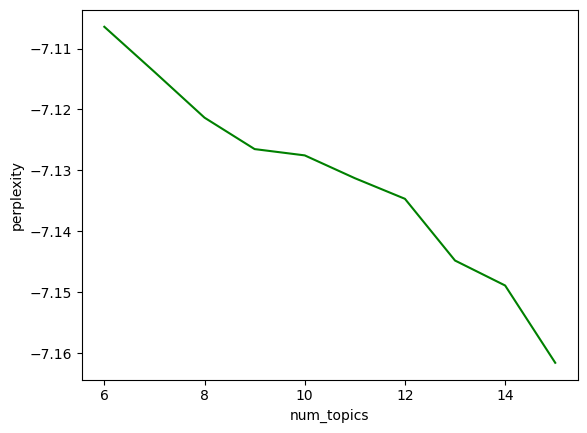

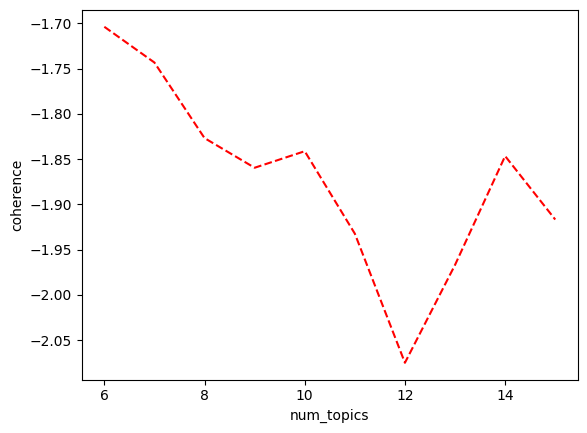

In [ ]:
def show_coherence(corpus, dictionary, start=3, end=7):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model=model, corpus=corpus,
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=6, end=15)